# 비지도학습 - K-means
- 독립변수(features)만 있는 경우 k개의 그룹으로 grouping
- 종속변수(target)이 없음

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = 'datas_ml/Mall_Customers.csv'
df = pd.read_csv(data_path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- ID 1과 비슷한 사람을 찾으려면?
- 비슷한 사람을 그룹핑해서 마케팅 전략을 세우고 싶다면?

In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
# 독립변수 추출
X = df.loc[:, 'Genre':]
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
sorted(X['Genre'].unique())

['Female', 'Male']

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
X['Genre'] = encoder.fit_transform(X['Genre'])
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## 데이터 정규화

In [9]:
from sklearn.preprocessing import StandardScaler
features = X.columns

# StandardScaler로 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features])

# 비지도학습 실습

In [10]:
from sklearn.cluster import KMeans

## 객체 생성

In [12]:
kmeans = KMeans(n_clusters = 3, random_state = 10)

## 비지도학습 실행

In [13]:
y_pred = kmeans.fit_predict(X_scaled)
y_pred

array([1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 1,
       2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       1, 1], dtype=int32)

In [14]:
# 예측결과 df에 추가하기
df['Group'] = y_pred
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [15]:
# 몇개의 그룹 갯수를 정하면 좋을지 찾는 방법
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
wcss

[799.9999999999999,
 588.8026767824936,
 485.7926901404427,
 386.71478577406873,
 331.26499941322993,
 289.8788870018376,
 239.8991826662323,
 220.847100981038,
 181.6303124014795,
 152.08676298710694]

In [16]:
import matplotlib.pyplot as plt

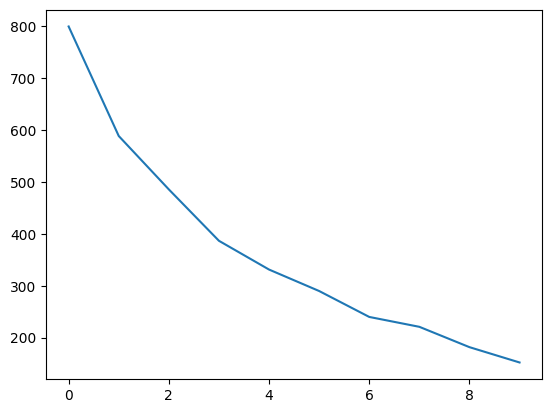

In [17]:
plt.plot(wcss)
plt.show()

In [18]:
# 클러스터(그룹)갯수를 정한다.

In [19]:
kmeans = KMeans(n_clusters=2, random_state=10)

In [20]:
y_pred = kmeans.fit_predict(X_scaled)

In [21]:
df['Group'] = y_pred
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [22]:
df.loc[df['Group']==1,]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
...,...,...,...,...,...,...
191,192,Female,32,103,69,1
193,194,Female,38,113,91,1
195,196,Female,35,120,79,1
197,198,Male,32,126,74,1


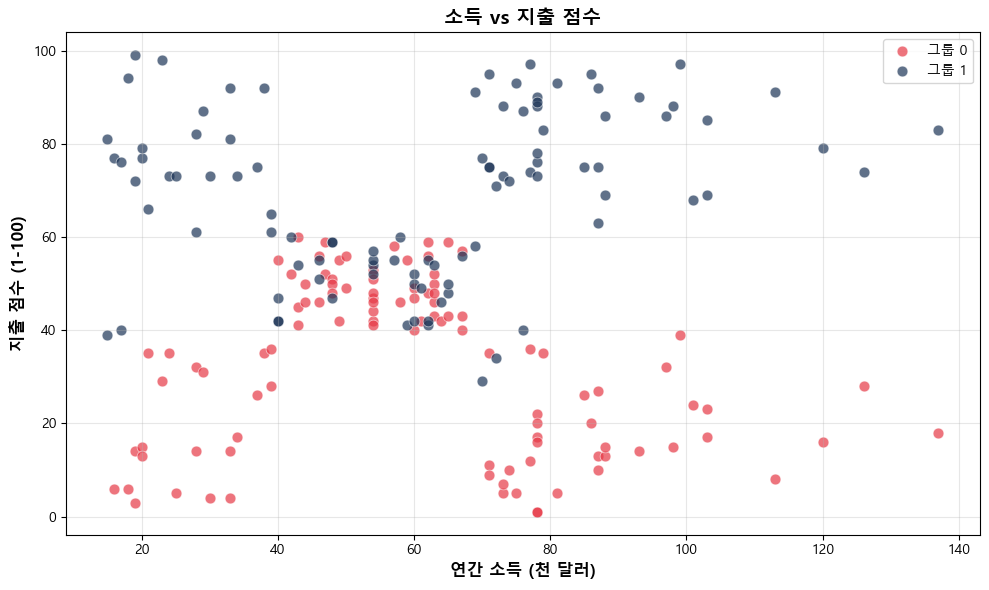

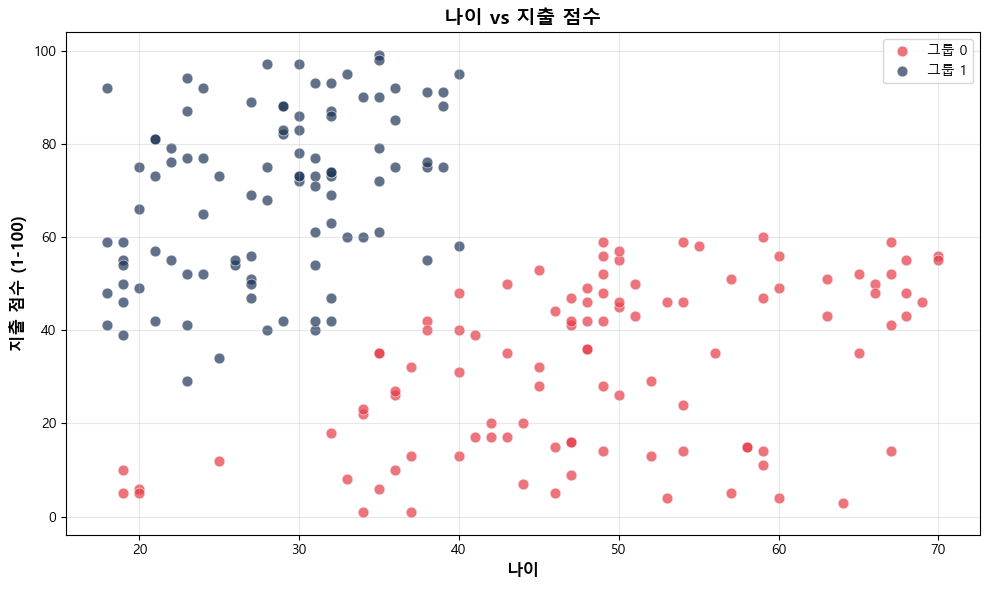

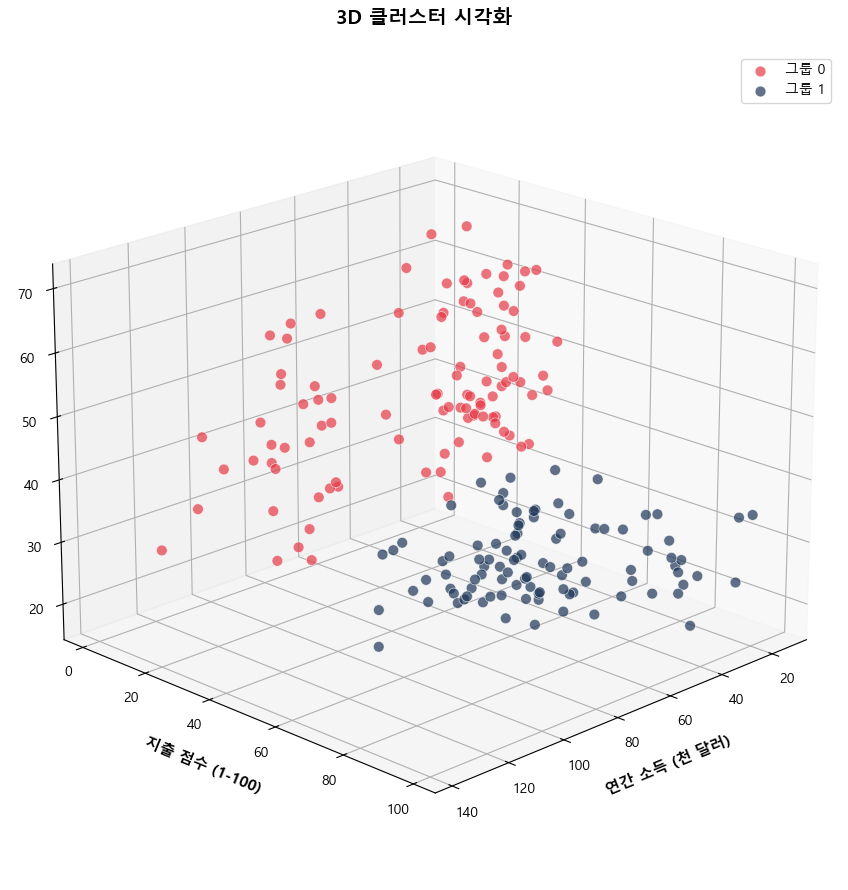


그룹별 통계:

그룹 0 (n=103)
  평균 나이: 48.7세
  평균 소득: $60.5k
  평균 지출점수: 32.2

그룹 1 (n=97)
  평균 나이: 28.4세
  평균 소득: $60.6k
  평균 지출점수: 69.3


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 색상 설정 (5개 그룹)
colors = ['#E63946', '#1D3557', '#F4A261', '#2A9D8F', '#E76F51', '#8338EC']
groups = sorted(df['Group'].unique())

# 1. 소득 vs 지출점수
plt.figure(figsize=(10, 6))
for group in groups:
    cluster_data = df[df['Group'] == group]
    plt.scatter(cluster_data['Annual Income (k$)'], 
               cluster_data['Spending Score (1-100)'],
               c=colors[group], 
               label=f'그룹 {group}',
               alpha=0.7,
               s=60,
               edgecolors='white',
               linewidth=0.5)

plt.xlabel('연간 소득 (천 달러)', fontsize=12, fontweight='bold')
plt.ylabel('지출 점수 (1-100)', fontsize=12, fontweight='bold')
plt.title('소득 vs 지출 점수', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cluster_income_spending.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 나이 vs 지출점수
plt.figure(figsize=(10, 6))
for group in groups:
    cluster_data = df[df['Group'] == group]
    plt.scatter(cluster_data['Age'], 
               cluster_data['Spending Score (1-100)'],
               c=colors[group], 
               label=f'그룹 {group}',
               alpha=0.7,
               s=60,
               edgecolors='white',
               linewidth=0.5)

plt.xlabel('나이', fontsize=12, fontweight='bold')
plt.ylabel('지출 점수 (1-100)', fontsize=12, fontweight='bold')
plt.title('나이 vs 지출 점수', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cluster_age_spending.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 3D 시각화 (소득, 나이, 지출점수)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for group in groups:
    cluster_data = df[df['Group'] == group]
    ax.scatter(cluster_data['Annual Income (k$)'], 
              cluster_data['Spending Score (1-100)'],
              cluster_data['Age'],
              c=colors[group], 
              label=f'그룹 {group}',
              alpha=0.7,
              s=60,
              edgecolors='white',
              linewidth=0.5)

ax.set_xlabel('연간 소득 (천 달러)', fontsize=11, fontweight='bold', labelpad=10)
ax.set_ylabel('지출 점수 (1-100)', fontsize=11, fontweight='bold', labelpad=10)
ax.set_zlabel('나이', fontsize=10, fontweight='bold', labelpad=10)
ax.set_title('3D 클러스터 시각화', fontsize=14, fontweight='bold', pad=20)
ax.legend()
ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.savefig('cluster_3d.png', dpi=300, bbox_inches='tight')
plt.show()

# 그룹별 통계
print("\n그룹별 통계:")
for group in groups:
    group_data = df[df['Group'] == group]
    print(f"\n그룹 {group} (n={len(group_data)})")
    print(f"  평균 나이: {group_data['Age'].mean():.1f}세")
    print(f"  평균 소득: ${group_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  평균 지출점수: {group_data['Spending Score (1-100)'].mean():.1f}")

In [31]:
# ID가 1인 사람과 유사한 그룹의 목록 추출

# df['Group']==1
# df[df['Group']==1]
df.loc[df['Group']==1].reset_index(drop=True)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,4,Female,23,16,77,1
3,5,Female,31,17,40,1
4,6,Female,22,17,76,1
...,...,...,...,...,...,...
92,192,Female,32,103,69,1
93,194,Female,38,113,91,1
94,196,Female,35,120,79,1
95,198,Male,32,126,74,1
